# Algoritmo de cálculo de pricing de MP

## Modelo flexible basado en multiplicidad de parámetros y factores:  
1- funcionalidades provistas al cliente  
2- tipos de instrumentos utilizados  
3- cantidad de instrumentos utilizados  
4- cantidad de operaciones realizadas  
5- cantidad de carteras bajo administración  
6- cantidad de cuentas (monetarias, custodias, cuotapartistas, de inversión) empleadas  
7- cantidad de usuarios que podrían acceder (eventualmente también si tendrán diferentes roles)  
8- valor neto bajo administración (NAV)  

### Switchs para definir el uso de factores.  
Es posible habilitar o deshabilitar algunos de los factores para
considerarlos o ignorarlos en el modelo, según el nivel de complejidad
deseado. El orden en el que se introducen es el definido en la lista de
arriba:

In [2]:
flag_func = 1 # funcionalidades
flag_instTypes = 1 # tipos de instrumentos
flag_instQty = 1 # cantidad de instrumentos
flag_ops = 1 # cantidad de operaciones
flag_ncart = 1 # cantidad de carteras
flag_nctas = 1 # cantidad de cuentas
flag_nusrs = 1 # cantidad de usuarios
flag_nav = 1 # NAV
flags_factores = [flag_func, flag_instTypes, flag_instQty, flag_ops, flag_ncart, flag_nctas, flag_nusrs, flag_nav]

import numpy as np
import matplotlib.pyplot as plt

### Parámetros para simular un caso.  
Definir alguno como NaN si no se desea especificar su valor en esta instancia (se usarán valores por default cargados más abajo).

In [3]:
tf = 1 # tier de funcionalidades 
tit = 1 # tier de tipos de instrumentos
ni = 120 # cantidad de instrumentos en uso
no = 240 # cantidad de operaciones realizadas
nc = 3 # cantidad de carteras
# cantidades de cuentas en uso
ncmo = 2 # monetarias
nccs = 2 # custodias
ncct = 2 # cuotapartistas
ncci = 5 # de inversión
# cantidades de usuarios habilitados
nuf = 1 # front
nub = 1 # back
nus = 1 # superuser
nav = 10.54 # NAV bajo administración, en millones

params = [tf, tit, ni, no, nc, ncmo, nccs, ncct, ncci, nuf, nub, nus, nav]
cant_cont_flag = 1 # considerar método continuo para el pricing por cantidad de instrumentos
ops_cont_flag = 1 # considerar método continuo para el pricing por cantidad de operaciones

### 1- funcionalidades provistas al cliente
Se separan en 3 niveles, de básicas a avanzadas.

In [4]:
if flags_factores[0] == 1:
    if np.isnan(params[0]) == 0:
        tier_func = params[0]
    else:
        tier_func = 1 # {1, 2, 3}

    precios_func = [500, 1000, 1350] # misma cantidad de elementos que el conjunto de tier_func

    P_func = precios_func[tier_func]
else:
    P_func = 0

### 2- tipos de instrumentos utilizados
Se separan en 3 niveles, de básicos a avanzados

In [5]:
if flags_factores[1] == 1:
    if np.isnan(params[1]) == 0:
        tier_instrumTypes = params[1]
    else:
        tier_instrumTypes = 1 # {1, 2, 3}

    precios_instrumTypes = [300, 600, 900] # misma cantidad de elementos que el conjunto de tier_instrum

    P_instrumTypes = precios_instrumTypes[tier_instrumTypes]
else:
    P_instrumTypes = 0

### 3- cantidad de instrumentos utilizados
Listar los instrumentos operados, list_ops  
Listar los instrumentos que estuvieron en cartera (podrían
no haber sido operados en el último periodo y preexistir), list_cartera  
Listar los instrumentos parametrizados, list_param  
Ninguno de los conjuntos necesariamente contiene a los otros. Lo correcto
es hacer la unión de los tres conjuntos. La cantidad de elementos resultante es n_instr  

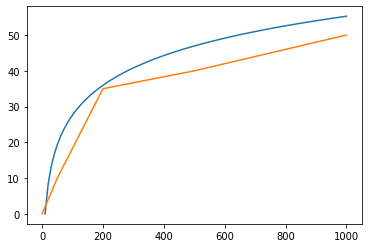

In [9]:
if flags_factores[2] == 1:
    if np.isnan(params[2]) == 0:
        n_instr = params[2]
    else:
        n_instr = 120

    # calibraciones
    # parámetros para la calibración de la función continua de precio
    k_n_instr = 12 # ponderador global
    offset_n_instr = 0 # offset de log
    multipl_n_instr = 0.1 # multiplicador del número de instrumentos
    # parámetros para la calibración de la función discreta de precio
    tiers_instrumQty = [0, 50, 200, 500, 1000]
    precios_instrumQty = [0, 10, 35, 40, 50]
        
    if cant_cont_flag == 1: # considerar método continuo para el pricing por cantidad de instrumentos
        
        P_instrumQty = k_n_instr * np.log(multipl_n_instr * n_instr + offset_n_instr)
    else: # método discreto (tiers)
        tier_n_instr_idx = 1

        while n_instr > tiers_instrumQty(tier_n_instr_idx):
            tier_n_instr_idx = tier_n_instr_idx + 1
            if tier_n_instr_idx > numel(tiers_instrumQty): break

        tier_n_instr_idx = tier_idx-1

        P_instrumQty = precios_instrumQty(tier_n_instr_idx)
else:
    P_instrumQty = 0

# gráfica comparativa de los resultados por pricing continuo, discreto
vxlog = np.arange(10,1001,10)
vylog = k_n_instr * np.log(multipl_n_instr * vxlog + offset_n_instr)
tiers_instrumQtyAux = [0, 49, 50, 199, 200, 499, 500, 999, 1000]
precios_instrumQtyAux = [0, 0, 10, 10, 35, 35, 40, 40, 50]
vxdisc = tiers_instrumQty
vydisc = precios_instrumQty

plt.plot(vxlog, vylog)
plt.plot(vxdisc, vydisc)

### 4- cantidad de operaciones realizadas

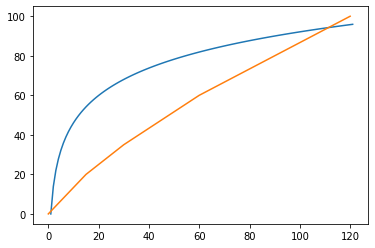

In [10]:
if flags_factores[3] == 1:
    if np.isnan(params[3]) == 0:
        n_ops = params[3]
    else:
        n_ops = 240

    # calibraciones
    # parámetros para la calibración de la función continua de precio
    k_n_ops = 20 # ponderador global
    offset_n_ops = 0 # offset de log
    multipl_n_ops = 1 # multiplicador del número de operaciones
    # parámetros para la calibración de la función discreta de precio
    tiers_ops = [0, 15, 30, 60, 120]
    precios_ops = [0, 20, 35, 60, 100]
        
    if ops_cont_flag == 1: # considerar método continuo para el pricing por cantidad de operaciones
        P_ops = k_n_ops * np.log(multipl_n_ops * n_ops + offset_n_ops)
    else: # método discreto (tiers)
        tier_n_ops_idx = 1

        while n_ops > tiers_ops(tier_n_ops_idx):
            tier_n_ops_idx = tier_n_ops_idx+1
            if tier_n_ops_idx > np.size(tiers_ops): break

        tier_n_ops_idx = tier_n_ops_idx-1

        P_ops = precios_ops(tier_n_ops_idx)
else:
    P_ops = 0

# gráfica comparativa de los resultados por pricing continuo, discreto
vxxlog = np.arange(1,122,1)
vyylog = k_n_ops * np.log(multipl_n_ops * vxxlog + offset_n_ops)
tiers_opsAux = [0, 14, 15, 29, 30, 59, 60, 119, 120]
precios_opsAux = [0, 0, 20, 20, 35, 35, 60, 60, 100]
vxxdisc = tiers_ops
vyydisc = precios_ops

plt.plot(vxxlog, vyylog)
plt.plot(vxxdisc, vyydisc)

## 5- cantidad de carteras bajo administración
Según la cantidad en uso el cliente caerá en un tier determinado.

In [11]:
if flags_factores[4] == 1:
    if np.isnan(params[4]) == 0:
        n_carteras = params[4]
    else:
        n_carteras = 3

    tiers_carteras = [0, 2, 5, 10, 25]
    precios_carteras = [0, 100, 200, 350, 700]
    tier_carteras_idx = 0

    while n_carteras > tiers_carteras[tier_carteras_idx]:
        tier_carteras_idx = tier_carteras_idx+1
        if tier_carteras_idx > np.size(tiers_carteras): break

    tier_carteras_idx = tier_carteras_idx-1

    P_carteras = precios_carteras[tier_carteras_idx]
else:
    P_carteras = 0

### 6- cantidad de cuentas (monetarias, custodias, cuotapartistas, de inversión) empleadas
El producto de base puede considerar una cantidad predeterminada de cuentas, por default (digamos, 2 de cada tipo). El cobro extra ocurre
cuando la cantidad de cuentas de algún tipo excede la cantidad de default.

In [12]:
if flags_factores[5] == 1:
    # Valores de default
    n_ctas_monet_def = 2
    n_ctas_cust_def = 2
    n_ctas_cuotap_def = 2
    n_ctas_inv_def = 2
    n_ctas_def = np.array([n_ctas_monet_def, n_ctas_cust_def, n_ctas_cuotap_def, n_ctas_inv_def])
    
    # En uso
    if np.isnan(params[5]) == 0: # asumo que las cantidades de cuentas fueron o bien todas definidas, o bien ninguna
        n_ctas_monet = params[5]
        n_ctas_cust = params[6]
        n_ctas_cuotap = params[7]
        n_ctas_inv = params[8]
    else:
        n_ctas_monet_def = 2
        n_ctas_cust_def = 2
        n_ctas_cuotap_def = 2
        n_ctas_inv_def = 5
    n_ctas = np.array([n_ctas_monet, n_ctas_cust, n_ctas_cuotap, n_ctas_inv])

    dif_cuentas = n_ctas - n_ctas_def
    dif_cuentas = [0 if i < 0 else i for i in dif_cuentas] # anular valores negativos (si hay menos cuentas en uso que las que la suscripción ofrece)
    n_cuentas_extra = np.sum(dif_cuentas)
        
    p_cta_extra = 12.5 # precio por cada cuenta extra

    P_cuentas = p_cta_extra * n_cuentas_extra
else:
    P_cuentas = 0

### 7- cantidad de usuarios que podrían acceder (eventualmente también si tendrán diferentes roles)
El producto de base puede considerar una cantidad predeterminada de usuarios, por default (digamos, 3: un front, un back, un superuser). El cobro extra ocurre cuando la cantidad de accesos de algun tipo excede la cantidad de default.

In [13]:
if flags_factores[6] == 1:
    # Valores de default
    n_front_def = 1
    n_back_def = 1
    n_su_def = 1
    n_usr_def = np.array([n_front_def, n_back_def, n_su_def])
    
    # En uso
    if np.isnan(params[9]) == 0: # asumo que las cantidades de usuarios fueron o bien todas definidas, o bien ninguna
        n_front = params[9]
        n_back = params[10]
        n_su = params[11]
    else:
        n_front_def = 1
        n_back_def = 1
        n_su_def = 1
    n_usr = np.array([n_front, n_back, n_su])
    
    p_user_extra = 55 # precio de cada usuario extra

    dif_users = n_usr - n_usr_def
    dif_users = [0 if i < 0 else i for i in dif_users] # anular valores negativos (si hay menos users en uso que los que la suscripción ofrece)
    n_users_extra = np.sum(dif_users)

    P_users = p_user_extra * n_users_extra
else:
    P_users = 0

### 8- valor neto bajo administración (NAV)
Entra como un factor multiplicativo sobre el resto del pricing.  
Se considera el valor prorrateado sobre todos los días del período.

In [22]:
if flags_factores[7] == 1:
    if np.isnan(params[12]) == 0:
        NAV_mill = params[12]
    else:
        NAV_mill = 59.78 # en millones, para simplificar la escritura

    NAV = NAV_mill * 1000000
    tiers_NAVs = np.array([1, 5, 10, 50, 100, 200]) * 1000000
    fact_NAVs = [1, 1.001, 1.0025, 1.005, 1.01, 1.0125]
    tier_NAVs_idx = 0

    while NAV > tiers_NAVs[tier_NAVs_idx]:
        tier_NAVs_idx = tier_NAVs_idx + 1
        if tier_NAVs_idx > np.size(tiers_NAVs): break

    tier_NAVs_idx = tier_NAVs_idx - 1

    k_NAV = fact_NAVs[tier_NAVs_idx]
else:
    k_NAV = 1

1.0025

### Pricing total

In [23]:
P = k_NAV * (P_func + P_instrumTypes + P_instrumQty + P_ops + P_carteras + P_cuentas + P_users)

In [24]:
P

1881.6239874099565